# Exponential and Logistic growth

Comparing exponential and logistic growth.

**Exponential model:**
- assumption that the growth of population is boundless
- the equation: **$ \frac{dx}{dt}= rx $** ($r$ is the reproductive rate, $x$ is the preceding size of population)

**Logistic growth:**
- the growth of population is limited 
- the equation: **$ \frac{dx}{dt}= rx(1-\frac{x}{K})$** ($r$ is the reproductive rate, $x$ is the preceding size of population,$K$ is carrying capacity (limit of population size))

### Logistic model (different values of r)

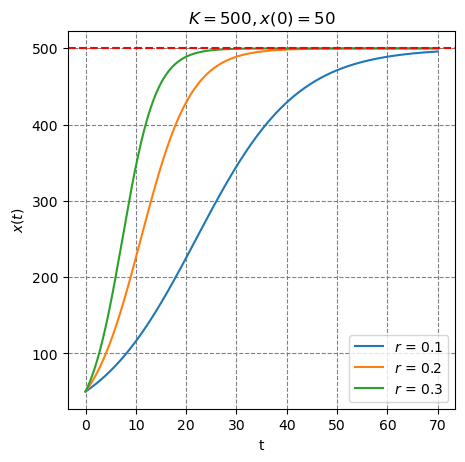

In [4]:
def logistic_growth(x,t,r,K):
    return(r*x*(1-x/K))

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

time = np.linspace(0,70,1000) # time vector
K = 500 # carrying capacity
r = [0.1,0.2,0.3] # reproductive rate vector
x_init = 50 #initial size of populations
plt.figure(figsize=(5,5),dpi=100)
for r1,i in zip(r, range(len(r))):
   #solving differential equation of logistic growth model
   sol_log = integrate.odeint(logistic_growth,x_init,time,args=(r1,K)) 
   plt.plot(time,sol_log[:,0],label='$r$ = '+str(r1))
   plt.legend(["r"])

# plotting graph size of population x(t) vs. time
plt.xlabel('t')
plt.ylabel('$x(t)$')
plt.axhline(K,linestyle='--',color='red')
plt.title('$K=500, x(0)=50$') 
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.legend()
plt.show()


### Comparing logistic and exponential model

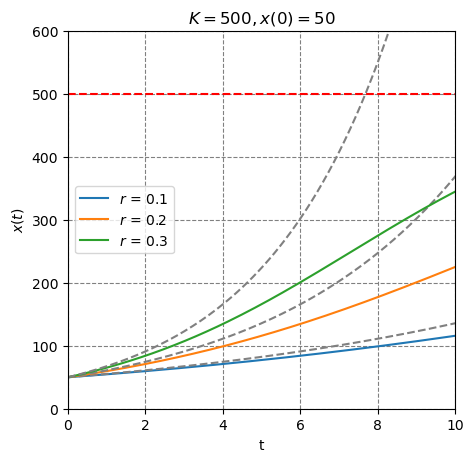

In [5]:
def exp_growth(x,t,r):
    return(r*x)

def logistic_growth(x,t,r,K):
    return(r*x*(1-x/K))

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

time = np.linspace(0,70,1000)
K = 500
r = [0.1,0.2,0.3]
x_init = 50
plt.figure(figsize=(5,5),dpi=100)
for r1,i in zip(r, range(len(r))):
   sol_log = integrate.odeint(logistic_growth,x_init,time,args=(r1,K)) 
   sol_exp = integrate.odeint(exp_growth,x_init,time,args=(r1,))
   plt.plot(time,sol_log[:,0],label='$r$ = '+str(r1))
   plt.plot(time,sol_exp[:,0],color='grey',linestyle='--')
   plt.legend(["r"])
plt.xlabel('t')
plt.ylabel('$x(t)$')
plt.axhline(K,linestyle='--',color='red')
plt.title('$K=500, x(0)=50$')
plt.ylim((0,600))
plt.xlim((0,10))
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.legend()
plt.show()

### Sunflower_data

Working with data file that contains information about age and height of sunflower. The task is to simulate the logistic and exponential growth model on this data set.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
sunflower_data = pd.read_csv('sunflower_data.csv')
sunflower_data

,Age,Height
0,7,16.9
1,14,37.1
2,21,69.1
3,28,98.6
4,35,131.4
5,42,171.8
6,49,208.0
7,56,229.9
8,63,251.8
9,70,253.5


<Figure size 500x500 with 0 Axes>

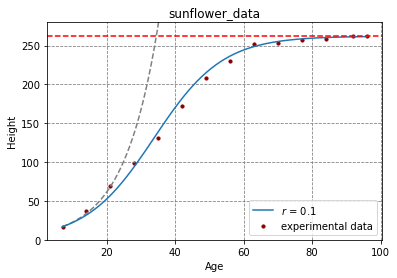

In [7]:
def exp_growth(x,t,r):
    return(r*x)

def logistic_growth(x,t,r,K):
    return(r*x*(1-x/K))

r=0.1
tmin=min(sunflower_data.Age)
tmax=max(sunflower_data.Age)
x0=sunflower_data.Height[0]
K=max(sunflower_data.Height)
time=np.linspace(tmin,tmax,200)

sol_log = integrate.odeint(logistic_growth,x0,time,args=(r,K)) 
sol_exp = integrate.odeint(exp_growth,x0,time,args=(r,))

plt.figure(figsize=(5,5),dpi=100)
sunflower_data.plot(kind='scatter',x='Age',y='Height',s=10, color='Darkred',label='experimental data')
plt.plot(time,sol_exp[:,0],color='grey',linestyle='--')
plt.plot(time,sol_log[:,0],label='$r$ = '+str(r))
plt.ylim((0,280))
plt.legend()
plt.axhline(K,linestyle='--',color='red')
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.title('sunflower_data')
plt.show()

### Lotka-Volterra model

**Equations:**

- $\frac{dx}{dt} = r_{pray}x - axy$ (growth rate of rabbit population)
<br>
<br>
- $\frac{dy}{dt} = -r_{pred}x + bxy$ (growth rate of fox population)
<br>
<br>
- $r_{pray}$ - reproductive rate of rabbit population
- $r_{pred}$ - reproductive rate of fox population
- $a$ - the natural dying rate of rabbits
- $b$ - the natural dying rate of foxes

#### Simulating Lotka-Volterra model on rabbit-fox data set

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

lvm_data= pd.read_csv('lvm_data.csv')
lvm_data

,Godina,Zec,Lisica
0,1900,30.0,4.0
1,1901,47.2,6.1
2,1902,70.2,9.8
3,1903,77.4,35.2
4,1904,36.3,59.4
5,1905,20.6,41.7
6,1906,18.1,19.0
7,1907,21.4,13.0
8,1908,22.0,8.3
9,1909,25.4,9.1


**LVM model - Rabbit population**

<Figure size 500x500 with 0 Axes>

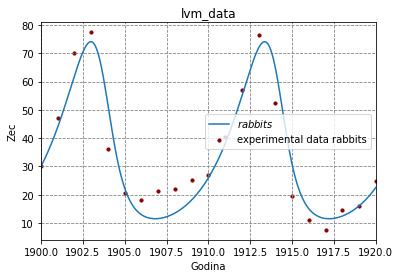

In [29]:


a=0.02482
r_prey=0.4807
r_predator=0.9272 
b=0.02756 
tmin=min(lvm_data.Godina)
tmax=max(lvm_data.Godina)
t=np.linspace(tmin,tmax,200)
p=[lvm_data.Zec[0],lvm_data.Lisica[0]]
sol=integrate.odeint(lvm_model,p,t,args=(r_prey,r_predator,a,b))
plt.figure(figsize=(5,5),dpi=100)
lvm_data.plot(kind='scatter',x='Godina',y='Zec',s=10, color='Darkred',label='experimental data rabbits')
plt.plot(t,sol[:,0],label='$rabbits$')
plt.xlim((1900,1920))
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.title('lvm_data')
plt.legend()
plt.show()

**LVM - fox populations**

<Figure size 500x500 with 0 Axes>

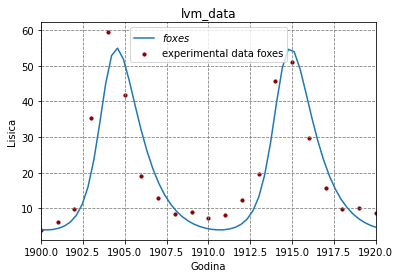

In [28]:
p=[lvm_data.Zec[0],lvm_data.Lisica[0]]
sol=integrate.odeint(lvm_model,p,t,args=(r_prey,r_predator,a,b))
plt.figure(figsize=(5,5),dpi=100)
lvm_data.plot(kind='scatter',x='Godina',y='Lisica',s=10, color='Darkred',label='experimental data foxes')
plt.plot(t,sol[:,1],label='$foxes$')
plt.xlim((1900,1920))
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.title('lvm_data')
plt.legend()
plt.show()

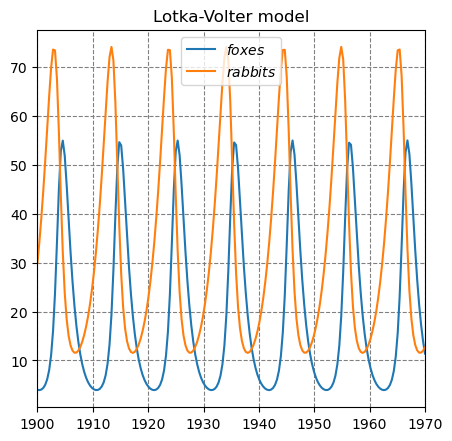

In [27]:
tmin=min(lvm_data.Godina)
tmax=max(lvm_data.Godina)
t=np.linspace(tmin,tmax+50,200)
p=[lvm_data.Zec[0],lvm_data.Lisica[0]]
sol=integrate.odeint(lvm_model,p,t,args=(r_prey,r_predator,a,b))
plt.figure(figsize=(5,5),dpi=100)
plt.plot(t,sol[:,1],label='$foxes$')
plt.plot(t,sol[:,0],label='$rabbits$')
plt.xlim((1900,1970))
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.title('Lotka-Volter model')
plt.legend()
plt.show()

**Phase portrait** 

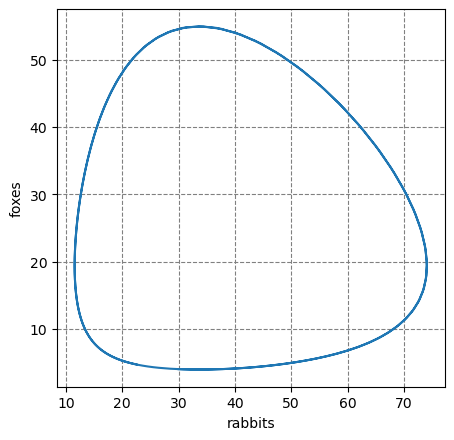

In [31]:
sol=integrate.odeint(lvm_model,p,t,args=(r_prey,r_predator,a,b))
plt.figure(figsize=(5,5),dpi=100)
plt.plot(sol[:,0],sol[:,1], "-")
plt.xlabel('rabbits')
plt.ylabel('foxes')
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.show()